<a href="https://colab.research.google.com/github/seodalzzz/Machine_Learning_implementation/blob/main/SVM_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

(1000, 4)
(1000, 3)
(1000,)


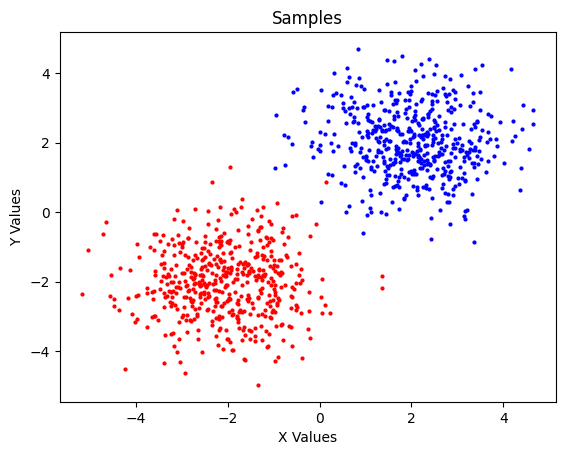

In [ ]:
num_sample = 500

data0 = np.random.randn(num_sample,2) + (2,2)
data1 = np.random.randn(num_sample,2) + (-2,-2)

data0 = np.hstack([data0,np.ones((num_sample,1),dtype=float),np.ones((num_sample,1),dtype=float)])
data1 = np.hstack([data1,np.ones((num_sample,1),dtype=float),-np.ones((num_sample,1),dtype=float)])

data = np.vstack([data0,data1])

print(data.shape)

X = data[:,:3]
Y = data[:,3]

print(X.shape)
print(Y.shape)

plt.title("Samples")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.scatter(data0[:,0],data0[:,1],s=4,color="b")
plt.scatter(data1[:,0],data1[:,1],s=4,color="r")
plt.show()

In [ ]:
def phi(x):
  transform=np.zeros((len(x),4))
  transform[:,0]=x[:,0]**2
  transform[:,1]=np.sqrt(2)*x[:,0]*x[:,1]
  transform[:,2]=x[:,1]**2
  transform[:,3]=np.ones((len(x)),dtype=float)

In [ ]:
class SVM:
    def __init__(self, lam, lr, X, Y):
        self.lam = lam # penalty scale
        self.lr = lr #learning rate
        self.X = X # training data input
        self.Y = Y # training data label
        self.W = np.random.randn(X.shape[1])
        self.num_data = X.shape[0]
        print("SVM initialized..")

    def cal_hinge(self,x,y):
        hinge=np.zeros(self.num_data)
        for i in range(self.num_data):
          hinge[i]=np.max(0,1-((np.dot(self.W.T,self.X[i])-2*self.W[2]))*self.Y[i])
        return hinge

    def constrain(self,x,y):
      return y*np.dot(x,self.W)

    def slack(self,x,y):
      return 1. -self.constrain(x,y)

    # data instance-wise loss and hit computation
    def compute_loss_and_hit(self, x, y):

        hinge_loss=np.maximum(self.slack(x,y),0.)
        loss=np.sum(np.multiply(self.W, self.W)+self.lam*hinge_loss)
        if self.constrain(x,y)<=0:
          hit=False
        else:
          hit=True
        return loss, hit


    # data instance-wise gradient computation, i.e., d/dW loss
    def compute_gradient(self, x, y):
        if self.slack(x,y)<=0:
          grad_w=2*self.W
        else:
          grad_w=2*self.W-(self.lam*y*x)
        return grad_w

    # optimize self.W with simple SGD, i.e., batch_size=1
    # compute total loss and training accuracy of current epoch
    def fit(self,num_epoch):
        for epoch in range(num_epoch):
          total_loss=0
          count=0
          perm=np.random.permutation(self.num_data)
          for ind in range(self.num_data):
            loss, hit=self.compute_loss_and_hit(self.X[perm[ind]], self.Y[perm[ind]])
            grad_w=self.compute_gradient(self.X[perm[ind]],self.Y[perm[ind]])
            self.W=self.W-(self.lr*grad_w)
            total_loss+=loss
            count+=hit
            accuracy=count/self.num_data

          if epoch % 100 == 0:
              print("Epoch: %d, Loss: %.2f, Accuracy: %.3f"%(epoch, total_loss, accuracy))

In [ ]:
model = SVM(lam=0.1,lr=1e-5,X=X,Y=Y)

SVM initialized..


In [ ]:
model.fit(num_epoch=1000)

Epoch: 0, Loss: 4622.32, Accuracy: 0.447
Epoch: 100, Loss: 297.55, Accuracy: 0.836
Epoch: 200, Loss: 201.78, Accuracy: 0.996
Epoch: 300, Loss: 197.39, Accuracy: 0.999
Epoch: 400, Loss: 196.95, Accuracy: 0.999
Epoch: 500, Loss: 196.91, Accuracy: 0.999
Epoch: 600, Loss: 196.89, Accuracy: 0.999
Epoch: 700, Loss: 196.89, Accuracy: 0.999
Epoch: 800, Loss: 196.89, Accuracy: 0.999
Epoch: 900, Loss: 196.88, Accuracy: 0.999


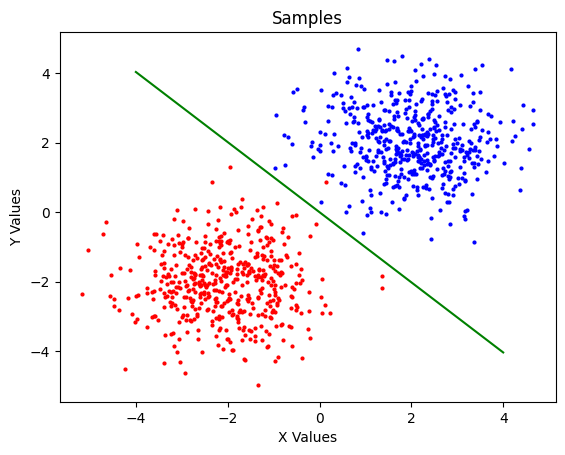

In [ ]:
plt.title("Samples")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.scatter(data0[:,0],data0[:,1],s=4,color="b")
plt.scatter(data1[:,0],data1[:,1],s=4,color="r")
plt.plot([-4, +4], [-(model.W[0]*(-4)+model.W[2])/model.W[1], -(model.W[0]*(+4)+model.W[2])/model.W[1]],color="g")
plt.show()